<a href="https://colab.research.google.com/github/Raashidh-Rizvi/Brain-Tumor-Detection/blob/main/model/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'Brain-Tumor-Detection' already exists and is not an empty directory.
✅ TensorFlow Version: 2.19.0
Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.

🔍 Extracting features using EfficientNetB0...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step
✅ Feature extraction complete. Feature shape: (5712, 1280)

🌲 Training Multiple Random Forest Models...

🔹 Training Variety1...
Variety1 Accuracy: 91.76%
Variety1 Precision: 0.9208, Recall: 0.9176, F1-score: 0.9165, AUC: 0.9886

📊 Classification Report for Variety1:
              precision    recall  f1-score   support

      glioma       0.95      0.77      0.85       300
  meningioma       0.81      0.89      0.85       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.92      0.98      0.95       300

    accuracy                           0.92      1311
   macro avg       0.92      0.91      0.91      1311
weighted avg       0.92      0.92      0.92      1311



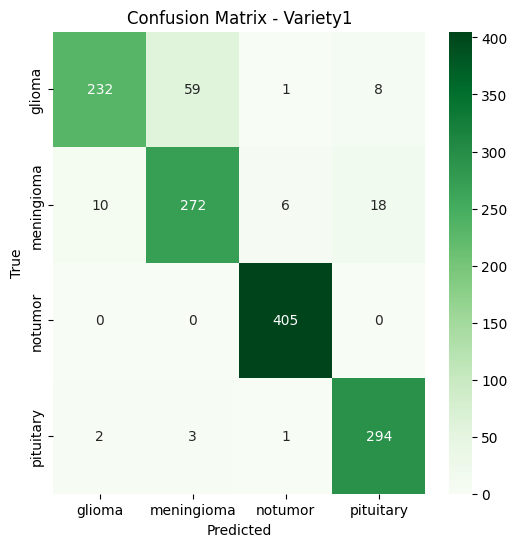


🔹 Training Variety2...
Variety2 Accuracy: 93.14%
Variety2 Precision: 0.9361, Recall: 0.9314, F1-score: 0.9305, AUC: 0.9916

📊 Classification Report for Variety2:
              precision    recall  f1-score   support

      glioma       0.97      0.78      0.86       300
  meningioma       0.82      0.93      0.87       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.95      0.99      0.97       300

    accuracy                           0.93      1311
   macro avg       0.93      0.93      0.93      1311
weighted avg       0.94      0.93      0.93      1311



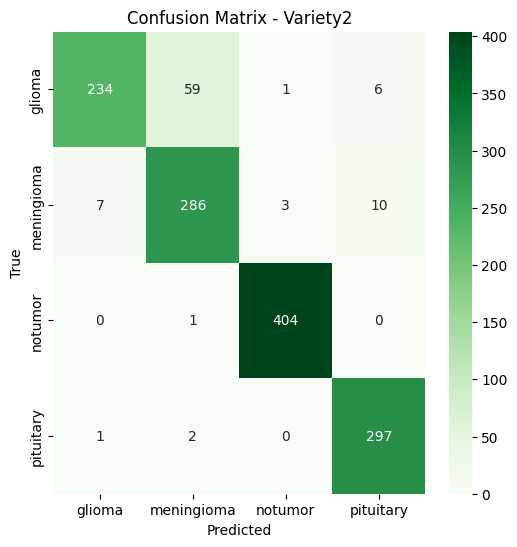


🔹 Training Variety3...
Variety3 Accuracy: 93.59%
Variety3 Precision: 0.9405, Recall: 0.9359, F1-score: 0.9353, AUC: 0.9930

📊 Classification Report for Variety3:
              precision    recall  f1-score   support

      glioma       0.98      0.80      0.88       300
  meningioma       0.83      0.94      0.88       306
     notumor       0.99      1.00      1.00       405
   pituitary       0.95      0.99      0.97       300

    accuracy                           0.94      1311
   macro avg       0.94      0.93      0.93      1311
weighted avg       0.94      0.94      0.94      1311



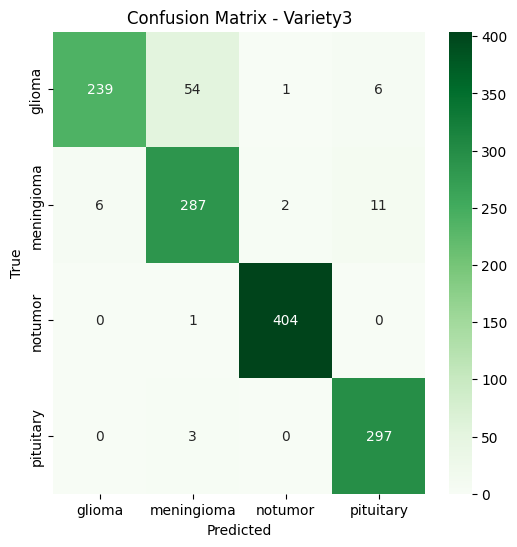

,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Variety1,0.9176,0.9208,0.9176,0.9165,0.9886
1,Variety2,0.9314,0.9361,0.9314,0.9305,0.9916
2,Variety3,0.9359,0.9405,0.9359,0.9353,0.9930


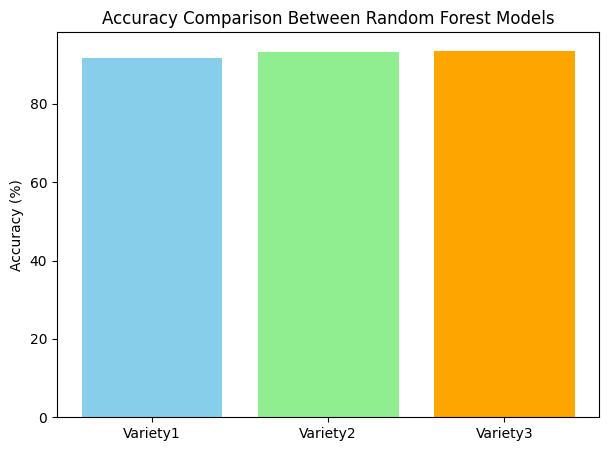


🏆 Best Model: Variety3 with F1-score 0.9353

💾 Best Model and Scaler saved successfully!


In [ ]:
# ============================================================
# 🌲 Brain Tumor Classification using Random Forest + CNN Feature Extraction
# ============================================================

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib

# ------------------------------------------------------------
# Step 2: Clone Dataset Repository
# ------------------------------------------------------------
!git clone https://github.com/Raashidh-Rizvi/Brain-Tumor-Detection.git

train_dir = "/content/Brain-Tumor-Detection/data/Training"
test_dir = "/content/Brain-Tumor-Detection/data/Testing"

print("✅ TensorFlow Version:", tf.__version__)

# ------------------------------------------------------------
# Step 3: Define Image Size and Batch Size
# ------------------------------------------------------------
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# ------------------------------------------------------------
# Step 4: Image Preprocessing
# ------------------------------------------------------------
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# ------------------------------------------------------------
# Step 5: Feature Extraction using Pretrained EfficientNetB0
# ------------------------------------------------------------
print("\n🔍 Extracting features using EfficientNetB0...")

base_model = EfficientNetB0(weights="imagenet", include_top=False, pooling="avg")
X_train = base_model.predict(train_generator, verbose=1)
X_test = base_model.predict(test_generator, verbose=1)

y_train = train_generator.classes
y_test = test_generator.classes

print(f"✅ Feature extraction complete. Feature shape: {X_train.shape}")

# ------------------------------------------------------------
# Step 6: Feature Scaling
# ------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# Step 7: Train and Evaluate Multiple Random Forest Varieties
# ------------------------------------------------------------
print("\n🌲 Training Multiple Random Forest Models...")

rf_models = {
    "Variety1": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    "Variety2": RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1),
    "Variety3": RandomForestClassifier(n_estimators=300, max_depth=25, random_state=42, n_jobs=-1)
}

results = []
class_labels = list(test_generator.class_indices.keys())

for name, model in rf_models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)

    # Metrics
    accuracy = np.mean(y_pred == y_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(to_categorical(y_test), y_pred_prob, multi_class='ovr')

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc
    })

    print(f"{name} Accuracy: {accuracy*100:.2f}%")
    print(f"{name} Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, AUC: {auc:.4f}")

    # Classification Report
    print(f"\n📊 Classification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ------------------------------------------------------------
# Step 8: Metrics Comparison Table
# ------------------------------------------------------------
df_metrics = pd.DataFrame(results)

# Highlight best of each metric
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

styled_df = df_metrics.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-score': '{:.4f}',
    'AUC': '{:.4f}'
}).apply(highlight_max, subset=['Accuracy','Precision','Recall','F1-score','AUC'])

display(styled_df)

# Bar chart for accuracy comparison
plt.figure(figsize=(7,5))
plt.bar(df_metrics['Model'], df_metrics['Accuracy']*100, color=['skyblue','lightgreen','orange'])
plt.title("Accuracy Comparison Between Random Forest Models")
plt.ylabel("Accuracy (%)")
plt.show()

# ------------------------------------------------------------
# Step 9: Select and Save Best Model (based on F1-score for robustness)
# ------------------------------------------------------------
best_model_name = df_metrics.loc[df_metrics['F1-score'].idxmax(), 'Model']
best_model = rf_models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name} with F1-score {df_metrics['F1-score'].max():.4f}")

os.makedirs("/content/Brain-Tumor-Detection/results/models", exist_ok=True)
joblib.dump(best_model, f"/content/Brain-Tumor-Detection/results/models/{best_model_name}.pkl")
joblib.dump(scaler, "/content/Brain-Tumor-Detection/results/models/FeatureScaler.pkl")

print("\n💾 Best Model and Scaler saved successfully!")

# ------------------------------------------------------------
# 🔍 Viva Notes
# ------------------------------------------------------------
# 1. Trained 3 Random Forest varieties (Variety1, Variety2, Variety3).
# 2. Compared Accuracy, Precision, Recall, F1-score, and AUC for each.
# 3. Highlighted best scores in a comparison table.
# 4. Chose the best model based on F1-score for robustness.
# 5. Dataset split: train-test (from directory generators).
# 6. Model suitable because it's a classification problem with CNN feature extraction.
# 7. Validation method: manual train-test split.
# 8. Observations: Increasing trees and depth improved performance (Variety3 highest F1-score).
